## AIM:

To classify the salary of adults on the basis of given feature values using naive bayes.

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Import libraries](#1)
2.	[Import dataset](#2)
3.	[Exploratory data analysis](#3)
4.	[Declare feature vector and target variable](#4)
5.	[Split data into separate training and test set](#5)
6.	[Feature engineering](#6)
7.	[Feature scaling](#7)
8.	[Model training](#8)
9.	[Predict the results](#9)
10.	[Check accuracy score](#10)
11.	[Confusion matrix](#11)
12.	[Classification metrices](#12)
13.	[Calculate class probabilities](#13)
14.	[ROC - AUC](#14)
15.	[k-Fold Cross Validation](#15)



## **1. Import libraries** <a class="anchor" id="1"></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [44]:
import warnings

warnings.filterwarnings('ignore')

# **2. Import dataset** <a class="anchor" id="2"></a>

In [ ]:
data = 'Datasets/adult_salary.csv'

df = pd.read_csv(data, sep=',\s')

In [46]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **3. Exploratory data analysis** <a class="anchor" id="3"></a>


In [47]:
df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

In [48]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Types of variables




### Explore categorical variables

In [51]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [52]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Summary of categorical variables


- There are 9 categorical variables. 


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

### Explore problems within categorical variables


In [53]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

### Frequency counts of categorical variables


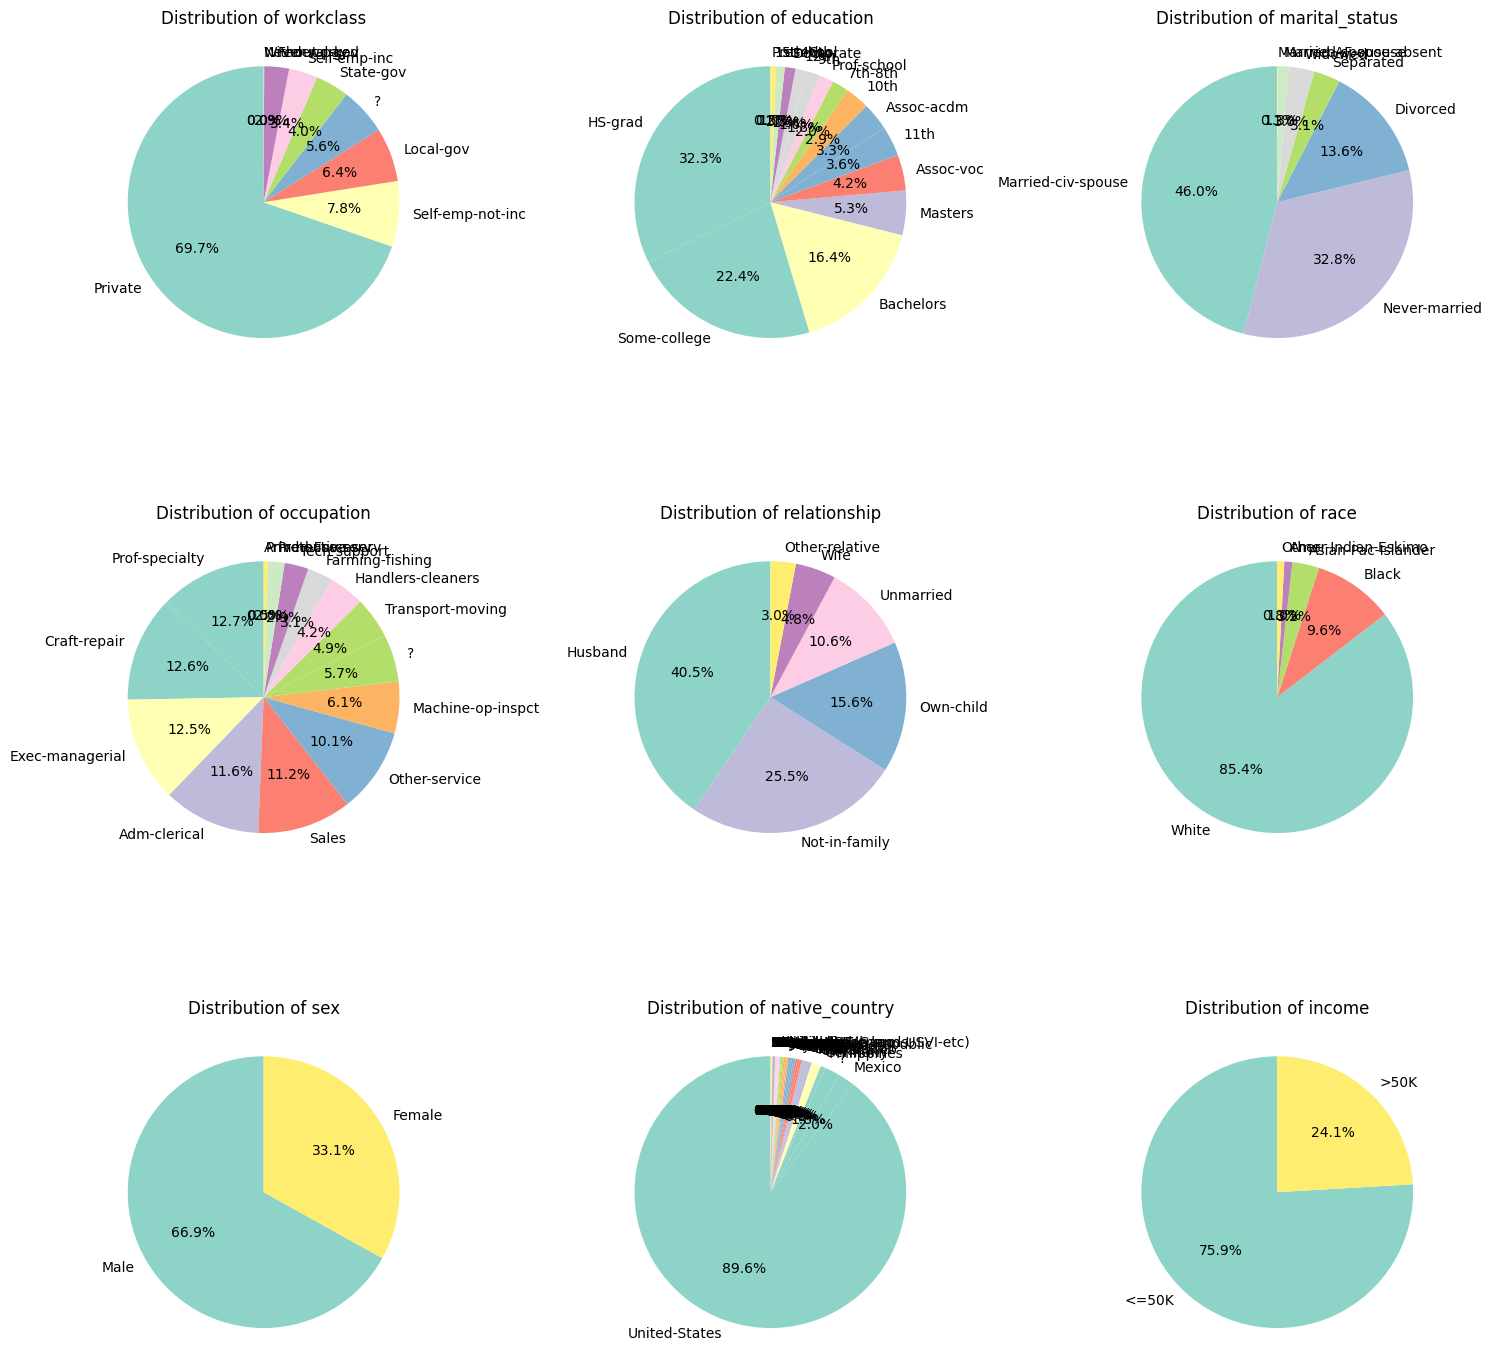

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, var in enumerate(categorical):
    df[var].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        cmap='Set3', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_ylabel('')
 
plt.tight_layout()
plt.show()

Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

I will explore these variables and replace `?` with `NaN`.

### Explore workclass variable

In [55]:
# check labels in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [57]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace('?', np.nan, inplace=True)

In [58]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Now, we can see that there are no values encoded as `?` in the `workclass` variable.

we can adopt similar approach with `occupation` and `native_country` column.

In [59]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [61]:
# replace '?' values in occupation variable and native_country with `NaN`

df['occupation'].replace('?', np.nan, inplace=True)
df['native_country'].replace('?', np.nan, inplace=True)

In [62]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

### Check missing values in categorical variables again

In [63]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Number of labels(unique_values): `cardinality`


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. 

In [64]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


### Explore Numerical Variables

In [65]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [66]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Summary of numerical variables


- There are 6 numerical variables. 


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type.

### Explore problems within numerical variables



### Missing values in numerical variables

In [67]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

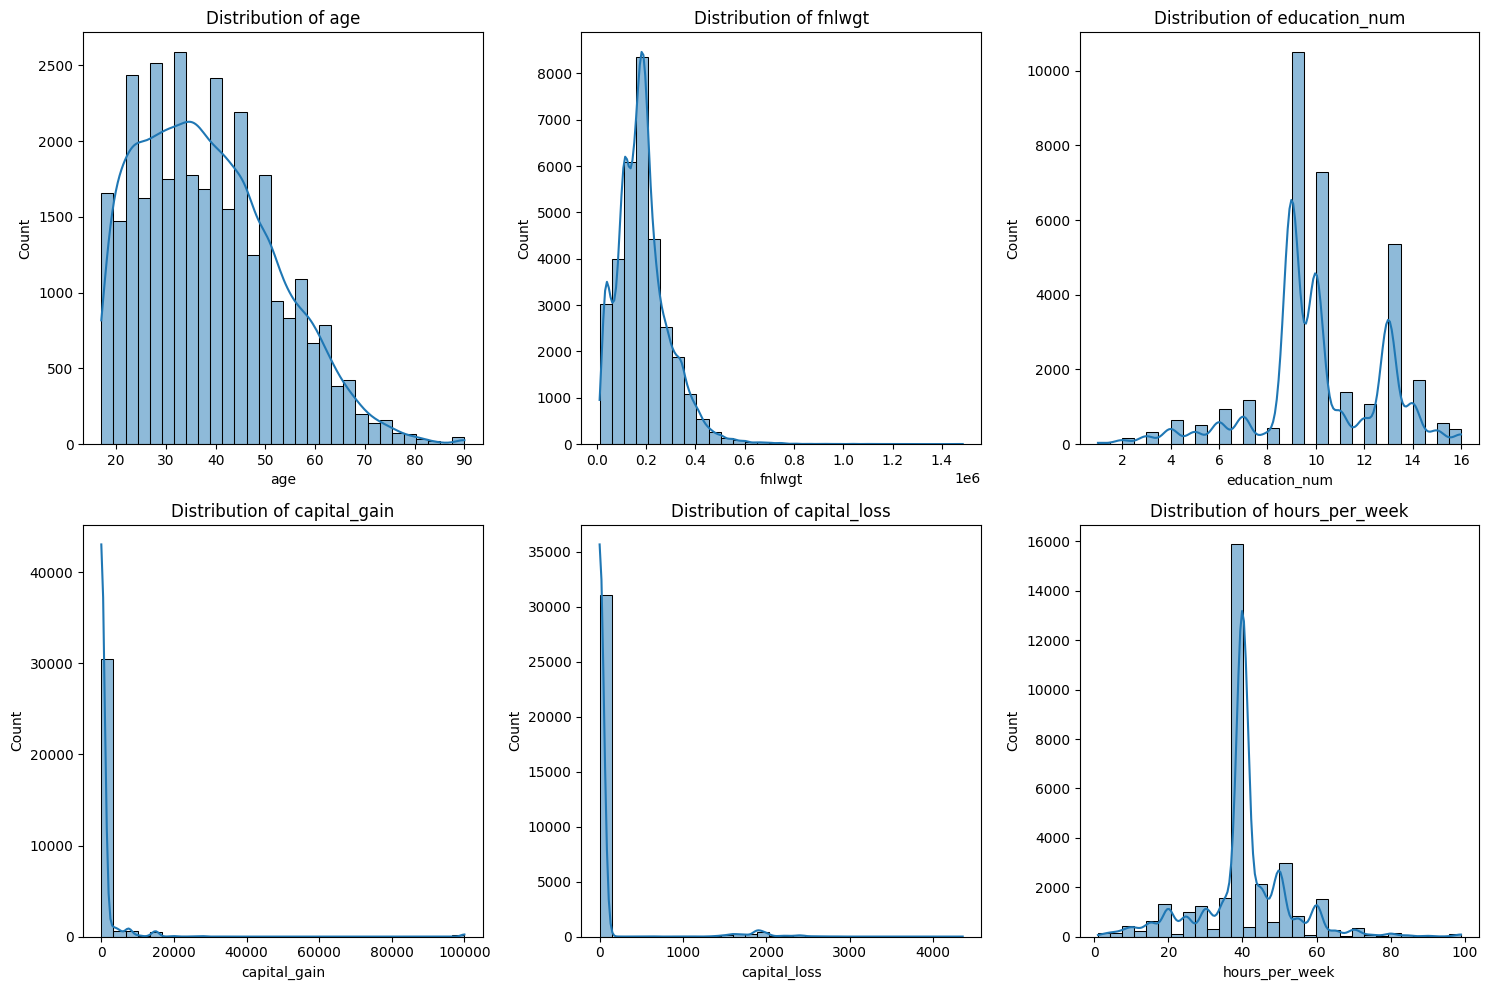

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, var in enumerate(numerical):
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# **4. Declare feature vector and target variable** <a class="anchor" id="4"></a>

In [69]:
X = df.drop(['income'], axis=1)

y = df['income']

# **5. Split data into separate training and test set** <a class="anchor" id="5"></a>

In [70]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [71]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# **6. Feature Engineering** <a class="anchor" id="6"></a>


- First, we will handle missing values of our dataset which are present in categorical variables.

In [72]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [73]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [74]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [75]:
# calculating missing percentage of data in those features.

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


- So, In comparision to complete dataset missing data is very small then we can impute with mode.

In [76]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

As a final check, I will check for missing values in X_train and X_test.

In [42]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [43]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Encode categorical variables

In [44]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [112]:
for i in categorical:
    print(i,X_train[i].unique())

workclass ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education ['HS-grad' 'Some-college' '7th-8th' 'Bachelors' 'Prof-school' '10th'
 'Masters' '11th' 'Assoc-acdm' '1st-4th' 'Assoc-voc' '9th' '5th-6th'
 'Preschool' '12th' 'Doctorate']
marital_status ['Married-civ-spouse' 'Divorced' 'Never-married' 'Separated' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Craft-repair' 'Adm-clerical' 'Sales' 'Prof-specialty' 'Farming-fishing'
 'Handlers-cleaners' 'Other-service' 'Transport-moving' 'Exec-managerial'
 'Machine-op-inspct' 'Tech-support' 'Protective-serv' 'Priv-house-serv'
 'Armed-Forces']
relationship ['Husband' 'Unmarried' 'Not-in-family' 'Own-child' 'Other-relative' 'Wife']
race ['White' 'Asian-Pac-Islander' 'Black' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native_country ['United-States' 'Guatemala' 'Germany' 'Columbia' 'Philippines'
 'Puerto-Rico' 'Ireland' 'Italy' 'Taiwan' 'Mexico' '

In [113]:
X_train.sample(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
21806,55,State-gov,169482,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
3962,30,Private,207253,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,England
17586,36,Private,49837,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
3086,44,Private,111275,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,Black,Female,0,0,56,United-States


In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define categorical & numerical columns
categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Define OneHotEncoder with category priority
category_order = {
    "workclass": ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
    "education": ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Doctorate', '11th', '10th', '9th', '12th', '7th-8th', '5th-6th', '1st-4th', 'Preschool'],
    "marital_status": ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
    "occupation": ['Exec-managerial', 'Prof-specialty', 'Tech-support', 'Sales', 'Adm-clerical', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Handlers-cleaners', 'Other-service', 'Protective-serv', 'Machine-op-inspct', 'Priv-house-serv', 'Armed-Forces'],
    "relationship": ['Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative', 'Not-in-family'],
    "race": ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
    "sex": ['Male', 'Female'],
    "native_country": ['United-States', 'Mexico', 'Canada', 'India', 'China', 'Philippines', 'Germany', 'England', 'France', 'Japan', 'Italy', 'Cuba', 'Vietnam', 'El-Salvador', 'Columbia', 'South', 'Jamaica', 'Ecuador', 'Haiti', 'Guatemala', 'Peru', 'Dominican-Republic', 'Poland', 'Iran', 'Greece', 'Portugal', 'Cambodia', 'Thailand', 'Yugoslavia', 'Laos', 'Taiwan', 'Honduras', 'Hungary', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Nicaragua', 'Holand-Netherlands']
}

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=[category_order[col] for col in categorical], handle_unknown='ignore', sparse_output=False, dtype=np.int32), categorical)
    ],
    remainder='passthrough'  # Keeps numerical columns as they are
)

# Fit & Transform data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [115]:
X_train_transformed

array([[   1,    0,    0, ..., 7298,    0,   60],
       [   0,    0,    0, ..., 1831,    0,   38],
       [   1,    0,    0, ...,    0,    0,   50],
       ...,
       [   1,    0,    0, ...,    0,    0,   40],
       [   0,    0,    1, ..., 7688,    0,   45],
       [   1,    0,    0, ..., 2597,    0,   48]])

In [116]:
X_test_transformed

array([[   1,    0,    0, ...,    0,    0,   44],
       [   1,    0,    0, ...,    0,    0,   40],
       [   1,    0,    0, ...,    0,    0,   40],
       ...,
       [   0,    0,    0, ..., 7688,    0,   40],
       [   0,    1,    0, ...,    0,    0,   40],
       [   1,    0,    0, ...,    0,    0,   40]])

In [117]:
preprocessor.get_feature_names_out()

array(['cat__workclass_Private', 'cat__workclass_Self-emp-not-inc',
       'cat__workclass_Local-gov', 'cat__workclass_State-gov',
       'cat__workclass_Federal-gov', 'cat__workclass_Self-emp-inc',
       'cat__workclass_Without-pay', 'cat__workclass_Never-worked',
       'cat__education_HS-grad', 'cat__education_Some-college',
       'cat__education_Bachelors', 'cat__education_Masters',
       'cat__education_Assoc-voc', 'cat__education_Assoc-acdm',
       'cat__education_Prof-school', 'cat__education_Doctorate',
       'cat__education_11th', 'cat__education_10th', 'cat__education_9th',
       'cat__education_12th', 'cat__education_7th-8th',
       'cat__education_5th-6th', 'cat__education_1st-4th',
       'cat__education_Preschool',
       'cat__marital_status_Married-civ-spouse',
       'cat__marital_status_Divorced',
       'cat__marital_status_Never-married',
       'cat__marital_status_Separated', 'cat__marital_status_Widowed',
       'cat__marital_status_Married-spouse-absent',

In [118]:
# Convert to DataFrame
feature_names = preprocessor.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_transformed, columns=feature_names)

# Display transformed DataFrame
print(X_train_encoded.tail(5))

       cat__workclass_Private  cat__workclass_Self-emp-not-inc  \
22787                       0                                0   
22788                       1                                0   
22789                       1                                0   
22790                       0                                0   
22791                       1                                0   

       cat__workclass_Local-gov  cat__workclass_State-gov  \
22787                         1                         0   
22788                         0                         0   
22789                         0                         0   
22790                         1                         0   
22791                         0                         0   

       cat__workclass_Federal-gov  cat__workclass_Self-emp-inc  \
22787                           0                            0   
22788                           0                            0   
22789                           0     

In [119]:
print(type(X_train_encoded))
print(type(X_test_encoded))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [120]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

We can see that from the initial 14 columns, we now have 102 columns.

In [123]:
X_train_encoded.shape, X_test_encoded.shape

((22792, 102), (9769, 102))

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **7. Feature Scaling** <a class="anchor" id="7"></a>

In [124]:
cols = X_train_encoded.columns

In [125]:
cols

Index(['cat__workclass_Private', 'cat__workclass_Self-emp-not-inc',
       'cat__workclass_Local-gov', 'cat__workclass_State-gov',
       'cat__workclass_Federal-gov', 'cat__workclass_Self-emp-inc',
       'cat__workclass_Without-pay', 'cat__workclass_Never-worked',
       'cat__education_HS-grad', 'cat__education_Some-college',
       ...
       'cat__native_country_Outlying-US(Guam-USVI-etc)',
       'cat__native_country_Scotland', 'cat__native_country_Nicaragua',
       'cat__native_country_Holand-Netherlands', 'remainder__age',
       'remainder__fnlwgt', 'remainder__education_num',
       'remainder__capital_gain', 'remainder__capital_loss',
       'remainder__hours_per_week'],
      dtype='object', length=102)

In [145]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_s = scaler.fit_transform(X_train_encoded)

X_test_s = scaler.transform(X_test_encoded)


In [146]:
X_train_s = pd.DataFrame(X_train_s, columns=[cols])

In [147]:
X_test_s = pd.DataFrame(X_test_s, columns=[cols])

In [148]:
X_train_s.head()

,cat__workclass_Private,cat__workclass_Self-emp-not-inc,cat__workclass_Local-gov,cat__workclass_State-gov,cat__workclass_Federal-gov,cat__workclass_Self-emp-inc,cat__workclass_Without-pay,cat__workclass_Never-worked,cat__education_HS-grad,cat__education_Some-college,...,cat__native_country_Outlying-US(Guam-USVI-etc),cat__native_country_Scotland,cat__native_country_Nicaragua,cat__native_country_Holand-Netherlands,remainder__age,remainder__fnlwgt,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0
1,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.55,0.080425,0.000000,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.40,-0.270650,-0.333333,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.70,0.210240,-2.000000,0.0,0.0,-3.0


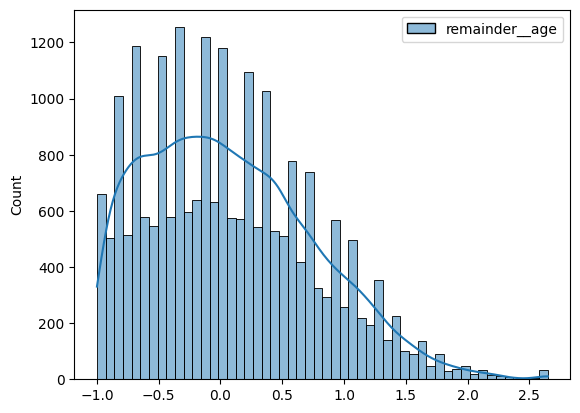

In [149]:
sns.histplot(X_train_s['remainder__age'],kde=True)
plt.show()

We now have `X_train` dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

# **8. Model training** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [150]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_s, y_train)


GaussianNB()

# **9. Predict the results** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [151]:
y_pred = gnb.predict(X_test_s)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

# **10. Check accuracy score** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [152]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8092


### Compare the train-set and test-set accuracy



In [154]:
y_pred_train = gnb.predict(X_train_s)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [155]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8077


### Check for overfitting and underfitting

In [157]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train_s, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test_s, y_test)))

Training set score: 0.8077
Test set score: 0.8092


### Compare model accuracy with null accuracy


So, the model accuracy is 0.8077. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [158]:
# check class distribution in test set

y_test.value_counts()

income
<=50K    7407
>50K     2362
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [159]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8077 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **11. Confusion matrix** <a class="anchor" id="11"></a>

In [160]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6010 1397]
 [ 467 1895]]

True Positives(TP) =  6010

True Negatives(TN) =  1895

False Positives(FP) =  1397

False Negatives(FN) =  467


The confusion matrix shows `5999 + 1897 = 7896 correct predictions` and `1408 + 465 = 1873 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 5999


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1897


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1408 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 465 `(Type II error)`

<Axes: >

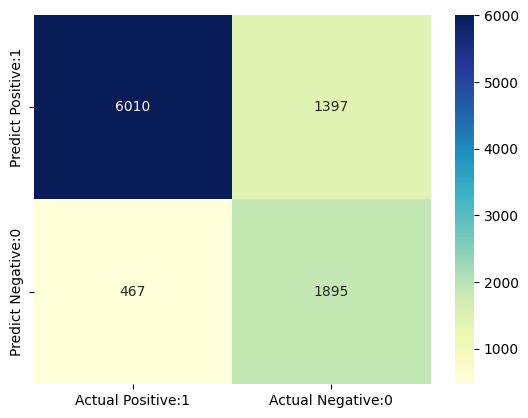

In [161]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **12. Classification metrices** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



# **13. Calculate class probabilities** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [171]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test_s)[0:10]

np.round(y_pred_prob,3)

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.158, 0.842],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.88 , 0.12 ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.988, 0.012],
       [1.   , 0.   ]])

In [177]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

np.round(y_pred_prob_df,3)

,Prob of - <=50K,Prob of - >50K
0,1.000,0.000
1,1.000,0.000
2,0.158,0.842
3,0.000,1.000
4,0.000,1.000
5,0.880,0.120
6,1.000,0.000
7,1.000,0.000
8,0.988,0.012
9,1.000,0.000


In [173]:
y_pred[0:10]

array(['<=50K', '<=50K', '>50K', '>50K', '>50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K'], dtype='<U5')

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - `<=50K` and `>50K`.

    - Class 0 => <=50K - Class that a person makes less than equal to 50K.    
    
    - Class 1 => >50K  - Class that a person makes more than 50K. 
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.    
    
    - Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.    
    


In [179]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test_s)[0:10, 1]

array([5.57281328e-07, 3.02925560e-04, 8.41660083e-01, 9.99821120e-01,
       9.99999992e-01, 1.19970729e-01, 7.11341575e-08, 6.34781566e-06,
       1.19058401e-02, 3.90077134e-09])

In [180]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test_s)[:, 1]

4# **14. ROC - AUC** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



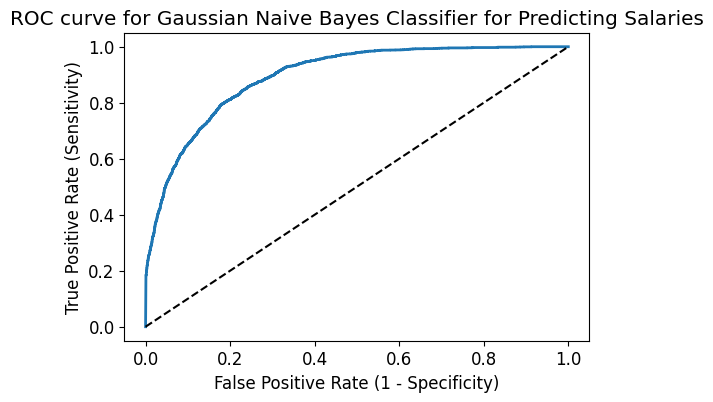

In [182]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [183]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC Score: {:.4f}'.format(ROC_AUC))

ROC AUC Score: 0.8941


### Interpretation


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [185]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_test_s, y_test, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8958


# **15. k-Fold Cross Validation** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)

In [188]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train_s, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81359649 0.80570175 0.81175954 0.80781044 0.79640193 0.79640193
 0.81219833 0.81175954 0.80254498 0.81044318]


We can summarize the cross-validation accuracy by calculating its mean.

In [189]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8069


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

- Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.